# ***PROBLEM STATEMENT***
Customer segmentation in retail business is vital to the success of modern enterprises. The sudden change in consumer expectations has led to the rise of targeted personalization. Customer segmentation is the proven method of ensuring that the e-commerce business remains profitable despite intense competition in an unpredictable business environment.

Customer segmentation separates customers into groups based on common characteristics, such as spending habits, gender, similar interests, and geographic locations.

Customer segmentation is of uttermost importance in E-commerce business because it helps in building stronger customer relationships, improve product offerings, and accurately guides efficient marketing campaigns.

In this project, we will be using K-means clustering algorithm to identify different customer segments or clusters which classify different customers into different categories.We will be using a given dataset of online retail e-commerce company.

*K-means clustering* is an unsupervised machine learning algorithm used for grouping data points into a predefined number of clusters (k) based on similarity.



## Steps included
1. Importing and understanding the dataset
2. Cleaning Data
3. Preprocessing the data
4. Model building
5. Model Evaluation
6. Final Analysis and Recommendations

First, we need to import all the necessary libraries required for this project

In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings     # To supress any warning
warnings.filterwarnings('ignore')

# Step 1: Import and Understand the dataset

In [357]:
retail_df = pd.read_csv('Online Retail.csv',sep =',', encoding = 'ISO-8859-1')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


This data set contains all the transactions occurring between 1/12/2010 to 9/12/2011.

In [358]:
# Checking Shape
retail_df.shape

(541909, 8)

Our dataset has 5,41,909 rows and 8 columns/features

In [359]:
# Checking info
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [360]:
# Checking some statistical information of continuous variables
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Step 2: Cleaning the data

In [361]:
# Checking missing values
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [362]:
# Checking missing values in %
round(retail_df.isnull().sum()*100/len(retail_df),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

* The 'Description' column has a 0.27% missing values so we can drop the rows with missing values
* The 'Customer ID' has almost 25% of missing values which is a lot, but since its an important feature for customer segmentation we canno t remove the whole column. So it's better to remove the rows with missing values

In [363]:
# Removing rows with missing values
retail_df = retail_df.dropna()
retail_df.shape

(406829, 8)

Now we have left with 4,06,829 rows now.

In [364]:
# Checking missing values again
round(retail_df.isnull().sum()*100/len(retail_df),2)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

Now we don't have missing values

In [365]:
# Checking for duplicate values
retail_df.duplicated().sum()

5225

In [366]:
retail_df[retail_df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


By seeing duplicates, we can say that there are just different products under the same invoice number, so there is no need to remove them.

In [367]:
# Checking data type
retail_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Here, 'InvoiceDate' is object type. We need to convert it into 'DateTime' data type.

In [368]:
# Changing data type
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], infer_datetime_format=True, errors='coerce')
retail_df.dtypes


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Now its okay.

# Step 3: Data preparation

For this clustering, we will be using ***RFM Analysis*** where-
* **R** stands for **Recency** : How recent does the last transaction was done by the customer
* **F** stands for **Frequency** : How frequent a customer purchases
* **M** stands for **Monetary** : Total amount of revenue contributed by the customer

So we need to create 3 different columns as:
1. **Recency** : Number of days since the last purchase
2. **Frequency** : Number of transactions
3. **Monetary** : Total amount of transactions (revenue contributed)

* ## Feature Engineering

### 1. Creating Monetary column

First, lets create a new column amount which contains the total amount spent on each order
amount = Quantity * Unit_Price

In [369]:
retail_df['Amount'] = retail_df['Quantity']*retail_df['UnitPrice']

In [370]:
# getting sum of all the amount spent by each customer
retail_df.groupby('CustomerID')['Amount'].sum()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64

We don't want customerID as our index, so we will reset index

In [371]:
# Lets, store this in a variable and reset index
grouped_df = retail_df.groupby('CustomerID')['Amount'].sum().reset_index()
grouped_df.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


With this, our first column is created.

### 2. Creating Frequency Column

In [372]:
# Let's count the number of invoice by each customer
frequency = retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


Now we will merge this grouped_df

In [373]:
# Merging df on CustomerID
grouped_df = pd.merge(grouped_df, frequency, on='CustomerID', how = 'inner')
grouped_df.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


### 3. Creating Recency column
For this, we first need to find the last transaction of this dataset which gives us till which date the dataset was collected. Then we can separate each transaction date to get the number of days passed till last transaction by the customer.

In [374]:
# Finding max date
max_date = retail_df['InvoiceDate'].max()
max_date

Timestamp('2011-12-09 12:50:00')

So, our last date is 09-12-2011

In [375]:
# Now computing the difference

# For this first create a 'diff' column in retail_df
retail_df['diff'] = max_date - retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


Now we need to gather the number of days since last purchase. For this we will take the minimum diff for each customerID

In [376]:
last_purchase = retail_df.groupby('CustomerID')['diff'].min().reset_index()
last_purchase.columns = ['CustomerID', 'Recency']   # Renaming column from diff to Recency
last_purchase

,CustomerID,Recency
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


Here, we don't want time in recency, we just want the number of days. So we will extract number of days.

In [377]:
# Getting only days count
last_purchase['Recency'] = last_purchase['Recency'].dt.days
last_purchase.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


Now it's good!

In [378]:
# merging with grouped_df
grouped_df = pd.merge(grouped_df, last_purchase, on='CustomerID', how = 'inner')
grouped_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


With this, we have created the new features that are required for our clustering.

Now, we need to do few more preprocessing like rescaling the data before building model

* ## Rescaling the Data

In [379]:
# First taking the columns to rescale
rfm_df = grouped_df[['Amount', 'Frequency', 'Recency']]
rfm_df.head()

,Amount,Frequency,Recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


Now, we will use Standard Scaling to rescale the data

In [380]:
# Scaling rmf_df

# initiate
scalar = StandardScaler()

# fit_transform
rfm_df_scaled = scalar.fit_transform(rfm_df)
rfm_df_scaled

array([[-0.23100099, -0.3917197 ,  2.32202285],
       [ 0.29343167,  0.38265697, -0.89373323],
       [-0.01231622, -0.26695902, -0.1691956 ],
       ...,
       [-0.20951263, -0.34439668, -0.83418219],
       [ 0.02390005,  2.85205812, -0.87388289],
       [-0.00744423, -0.0991774 , -0.48680114]])

In [381]:
rfm_df_scaled.shape

(4372, 3)

We have now a 3d array. We need to convert it back to dataframe.

In [382]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.231001,-0.391720,2.322023
1,0.293432,0.382657,-0.893733
2,-0.012316,-0.266959,-0.169196
3,-0.017146,-0.086271,-0.725005
4,-0.190312,-0.327188,2.163220


##### With this our preprocessing is completed

# Step 4: Model Building

Since in K-means clustering, we need to first specify the number of clusters we want.It can be chosen according to business or we have to find the optimal k value for our data. And it is important to give optimal number of clusters since it can affect the efficiency of the model. 

For this project we will be using *Elbow curve method* to find the optimal number of clusters for our model

* ## Finding optimal number of Clusters
The Elbow Method works in below steps:
1. Calculate the distance WCSS(Within-Cluster Sum of Squares)
2. For each k value, we run the k means and check the wcss
3. Plotting graph of wcss
3. Identifying the Elbow Point- Selecting the point(k value) from which the variation doesn't decrease much.
4. That point will be our optimal k value to build model.

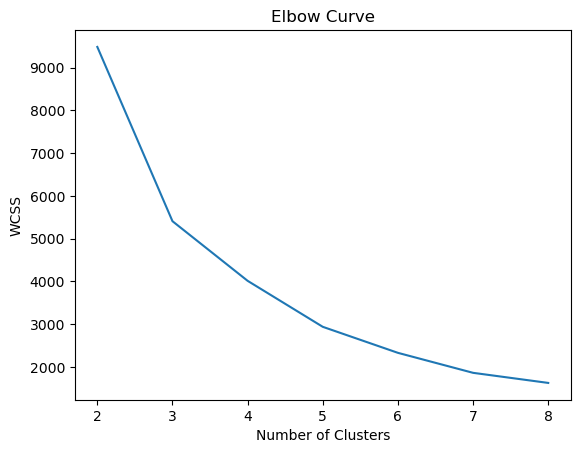

In [383]:
# Number of clusters we want to test
range_n_clusters = [2,3,4,5,6,7,8]

wcss = [] # For storing wcss for each cluster

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, max_iter = 50)
    kmeans.fit(rfm_df_scaled)

    wcss.append(kmeans.inertia_)

plt.plot(range_n_clusters,wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From this graph, we can say that the variation is not much decreasing after the point 3. So we can take 3 as an optimal value.

In [ ]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [387]:
# Assign labels to each point of the table grouped_df with the cluster they belong
grouped_df['Cluster_Id'] = kmeans.labels_
grouped_df.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1
